In [1]:
import requests
from bs4 import BeautifulSoup  
import pandas as pd

In [2]:
url = 'https://countrymusichalloffame.org/hall-of-fame/members/'
response = requests.get(url)

response.status_code

200

In [4]:
###print(type(response))
###response.content

In [5]:
soup = BeautifulSoup(response.content, 'lxml')
print(soup.title)

<title>Hall of Fame Members | Country Music Hall of Fame</title>


In [6]:
## i guess this helps???
print(soup.prettify())

<!DOCTYPE html>
<html lang="en-US">
 <head>
  <!-- Google Tag Manager -->
  <script>
   (function(w,d,s,l,i){w[l]=w[l]||[];w[l].push({'gtm.start':

new Date().getTime(),event:'gtm.js'});var f=d.getElementsByTagName(s)[0],

j=d.createElement(s),dl=l!='dataLayer'?'&l='+l:'';j.async=true;j.src=

'https://www.googletagmanager.com/gtm.js?id='+i+dl;f.parentNode.insertBefore(j,f);

})(window,document,'script','dataLayer','GTM-TVMMMDC');
  </script>
  <!-- End Google Tag Manager -->
  <meta charset="utf-8"/>
  <meta content="width=device-width, initial-scale=1.0" name="viewport"/>
  <meta content="IE=edge" http-equiv="X-UA-Compatible"/>
  <link href="https://gmpg.org/xfn/11" rel="profile"/>
  <link href="https://countrymusichalloffame.org/wp/xmlrpc.php" rel="pingback"/>
  <!--[if lt IE 9]>
	<script src="https://countrymusichalloffame.org/content/themes/bb-theme/js/html5shiv.js"></script>
	<script src="https://countrymusichalloffame.org/content/themes/bb-theme/js/respond.min.js"></script>
<![en

In [7]:
soup

<!DOCTYPE html>
<html lang="en-US">
<head>
<!-- Google Tag Manager -->
<script>(function(w,d,s,l,i){w[l]=w[l]||[];w[l].push({'gtm.start':

new Date().getTime(),event:'gtm.js'});var f=d.getElementsByTagName(s)[0],

j=d.createElement(s),dl=l!='dataLayer'?'&l='+l:'';j.async=true;j.src=

'https://www.googletagmanager.com/gtm.js?id='+i+dl;f.parentNode.insertBefore(j,f);

})(window,document,'script','dataLayer','GTM-TVMMMDC');</script>
<!-- End Google Tag Manager -->
<meta charset="utf-8"/>
<meta content="width=device-width, initial-scale=1.0" name="viewport"/>
<meta content="IE=edge" http-equiv="X-UA-Compatible"/>
<link href="https://gmpg.org/xfn/11" rel="profile"/>
<link href="https://countrymusichalloffame.org/wp/xmlrpc.php" rel="pingback"/>
<!--[if lt IE 9]>
	<script src="https://countrymusichalloffame.org/content/themes/bb-theme/js/html5shiv.js"></script>
	<script src="https://countrymusichalloffame.org/content/themes/bb-theme/js/respond.min.js"></script>
<![endif]-->
<title>Hall of Fam

## Extracting the Years

In [8]:
###card is the text card with all of the relevant information
cards = soup.find(attrs = {'vertical-cards-container'})

In [9]:
Inducted = cards.find_all('p')
inductlist = []

In [10]:
for x in Inducted:
    inductlist.append(str(x))

In [11]:
split_string = []
for x in range(len(inductlist)):
    split_string.append(inductlist[x].split())

In [12]:
split_string

[['<p>', 'Inducted', '1962', '</p>'],
 ['<p>', 'Inducted', '2005', '</p>'],
 ['<p>', 'Inducted', '2001', '</p>'],
 ['<p>', 'Inducted', '1966', '</p>'],
 ['<p>', 'Inducted', '1973', '</p>'],
 ['<p>', 'Inducted', '1969', '</p>'],
 ['<p>', 'Inducted', '2005', '</p>'],
 ['<p>', 'Inducted', '2013', '</p>'],
 ['<p>', 'Inducted', '1999', '</p>']]

In [13]:
years = []
for x in range(len(split_string)):
    years.append((split_string[x][2]))

In [14]:
years

['1962', '2005', '2001', '1966', '1973', '1969', '2005', '2013', '1999']

## Extracting the Names

In [15]:
messy_names = soup.find_all('h3')
name_list = []
for x in messy_names:
    name_list.append(str(x))

In [16]:
namespage = []
for x in range(len(name_list)):
    namespage.append(name_list[x][4:-5])

In [17]:
namespage

['Roy Acuff',
 'Alabama',
 'Bill Anderson',
 'Eddy Arnold',
 'Chet Atkins',
 'Gene Autry',
 'DeFord Bailey',
 'Bobby Bare',
 'Johnny Bond']

## Building Dataframe

In [19]:
superlist = [list(x) for x in zip(namespage, years)]
firstpage = pd.DataFrame(superlist, columns=['name','year'])

In [20]:
firstpage

,name,year
0,Roy Acuff,1962
1,Alabama,2005
2,Bill Anderson,2001
3,Eddy Arnold,1966
4,Chet Atkins,1973
5,Gene Autry,1969
6,DeFord Bailey,2005
7,Bobby Bare,2013
8,Johnny Bond,1999


# Making the big dataframe
##### I guess???

### Starting out by extracting the years
#### Also, having to reintroduce the urls to make them work in the for loop

In [21]:
###First, building a function that includes all of the above work-
###fstring url to help with the for loop
big_year_list = []
def bigfunct(tag):    
    inductlist = []
    split_string = []
    years = []
    url1 = f'https://countrymusichalloffame.org/hall-of-fame/members/page/{tag}'
    response = requests.get(url1)
    soup = BeautifulSoup(response.content, 'lxml')
    for x in range(len(split_string)):
        years.append((split_string[x][2]))
    cards = soup.find(attrs = {'vertical-cards-container'})
    Inducted = cards.find_all('p')
    for x in Inducted:
        inductlist.append(str(x))
    for x in range(len(inductlist)):
        split_string.append(inductlist[x].split())
    for x in range(len(split_string)):
        big_year_list.append((split_string[x][2]))

###### Question: my for loop only worked accurately when I did range(1,17). Why tho?

In [22]:
for x in range(1,17):
    bigfunct(x)
print(big_year_list)

['1962', '2005', '2001', '1966', '1973', '1969', '2005', '2013', '1999', '2011', '2006', '2019', '1974', '1987', '2012', '2019', '2015', '2015', '1991', '2005', '2002', '1970', '1980', '2009', '2013', '1973', '2014', '1976', '2003', '1981', '2016', '1972', '2010', '2001', '1966', '1983', '2007', '2001', '1985', '2004', '1967', '1990', '2016', '1967', '1982', '1980', '2001', '2007', '2018', '1994', '2008', '2008', '1966', '2001', '1982', '1997', '2010', '2017', '2006', '2001', '1992', '1978', '2001', '1974', '2004', '2001', '1997', '1979', '2001', '1988', '1966', '2009', '2015', '2009', '2011', '1995', '2014', '1970', '1996', '1998', '2001', '1993', '2015', '1996', '1999', '1975', '1984', '2001', '2001', '1998', '1992', '1996', '2000', '2017', '1967', '1964', '2012', '1982', '1961', '2013', '1988', '1961', '1986', '1971', '2017', '2011', '2010', '1967', '2018', '2003', '2012', '1979', '1980', '1989', '2019', '1989', '2008', '2006', '1986', '2008', '1989', '2007', '1984', '1977', '2016',

In [23]:
len(big_year_list)
###this seems to be correct

140

##### Onto the names now!

In [24]:
names = []
def namefunct(tag):
    name_list = []
###for sake of clarity, I'll be using different variables and container names
    url2 = f'https://countrymusichalloffame.org/hall-of-fame/members/page/{tag}'
    response = requests.get(url2)
    soup = BeautifulSoup(response.content, 'lxml')
    messy_names = soup.find_all('h3')
    for i in messy_names:
        name_list.append(str(i))
    for i in range(len(name_list)):
        names.append(name_list[i][4:-5])

In [25]:
for i in range(1,17):
    namefunct(i)
len(names)

140

#### everything seems to work.
## TO make the big dataframe now!

In [26]:
###Merging both lists into a list of lists. Turning that list of lists into a dataframe
superduperlist = [list(x) for x in zip(names, big_year_list)]
HallofFame = pd.DataFrame(superduperlist, columns=['name','year'])

In [27]:
HallofFame.head()

,name,year
0,Roy Acuff,1962
1,Alabama,2005
2,Bill Anderson,2001
3,Eddy Arnold,1966
4,Chet Atkins,1973


### Visualizations below

In [36]:
messy_count = pd.value_counts(HallofFame['year'])
year_count = messy_count.reset_index()
year_count = year_count.rename(columns = {'index': 'year', 'year': 'count'})

<AxesSubplot:xlabel='year'>

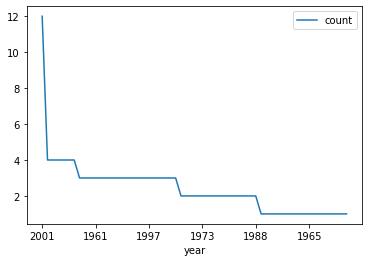

In [39]:
year_count.plot.line('year', 'count')

### Testsite below

In [8]:
for a in soup.find_all('p'):
    print(soup.find_all('p'))

[<p></p>, <p style="text-align: center;">Open Daily</p>, <p></p>, <p>Election to the Country Music Hall of Fame is country music's highest honor. The Country Music Association (CMA), the country music industry's trade organization, created the accolade to recognize significant contributions to the advancement of country music by individuals in both the creative and business communities. The first members—Jimmie Rodgers, Fred Rose, and Hank Williams—were inducted in 1961.</p>, <p><strong>Interested in supporting the Museum through our Annual Fund or interested in Museum member benefits?</strong></p>, <p>
                    Inducted 1962                  </p>, <p>
                    Inducted 2005                  </p>, <p>
                    Inducted 2001                  </p>, <p>
                    Inducted 1966                  </p>, <p>
                    Inducted 1973                  </p>, <p>
                    Inducted 1969                  </p>, <p>
                    Ind

In [9]:
names = soup.find_all('h3')

In [10]:
names

[<h3>Roy Acuff</h3>,
 <h3>Alabama</h3>,
 <h3>Bill Anderson</h3>,
 <h3>Eddy Arnold</h3>,
 <h3>Chet Atkins</h3>,
 <h3>Gene Autry</h3>,
 <h3>DeFord Bailey</h3>,
 <h3>Bobby Bare</h3>,
 <h3>Johnny Bond</h3>]

In [11]:
for l in soup.find_all('h3'):
    print(link.get('h3'))

NameError: name 'link' is not defined

In [ ]:
attrs = {'class' : 'vertical-card_content'}

In [ ]:
test

In [9]:
Hof = soup.find_all(class_= 'vertical-card_content')

In [10]:
Hof

[<div class="vertical-card_content">
 <div class="vertical-card_content--title">
 <h3>Roy Acuff</h3>
 </div>
 <div class="vertical-card_content--copy">
 <p>
                     Inducted 1962                  </p>
 </div>
 <div class="fbyf-btn-wrapper inline-text">
 <a href="https://countrymusichalloffame.org/artist/roy-acuff/">
 <span>Learn More</span>
 <svg height="15px" version="1.1" viewbox="0 0 15 15" width="15px" xmlns="http://www.w3.org/2000/svg" xmlns:xlink="http://www.w3.org/1999/xlink">
 <g fill="none" fill-rule="evenodd" id="Symbols" stroke="none" stroke-width="1">
 <g id="Icon/CMHOF/arrow-right">
 <rect height="15" id="Rectangle" width="15" x="0" y="0"></rect>
 <polygon fill="#F0B23A" id="Fill-1" points="8.59732882 13.03125 8.59732882 9.79762459 2 9.79762459 2 4.25168919 8.59732882 4.25168919 8.59732882 1 13.96875 7.01562616"></polygon>
 </g>
 </g>
 </svg>
 </a>
 </div>
 </div>,
 <div class="vertical-card_content">
 <div class="vertical-card_content--title">
 <h3>Alabama</h

In [ ]:
for a in Hof:
    print(a, end ='\n'*2)

In [ ]:
soup.find_all('p')

"\n\n\n\n\n\n\n\n\n\n\nHall of Fame Members | Country Music Hall of Fame\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\nTICKET AVAILABILITY IS LIMITED. PLEASE RESERVE YOUR TIMED TICKET BY PHONE AT 615-416-2001 OR BY CLICKING HERE.\r\n \n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\nSelect Another SiteHatch Show PrintHistoric RCA Studio BCMA Theater\n\n\n\n\n\n\n\n\n\nOpen Daily\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n \nBecome a Museum MemberMuseum Member Log In\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n0\n\n \n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n \nHall of Fame Members Induction: Medallion Ceremony Election Process Hall of Fame Rotunda Architecture Plaques Circle Guard Rite of Remembrance and Salute Ceremonial Stole Support the HallCollections Digital Archive Moving Image Collection Bob Pinson Recorded Sound Collection Photographs Google Arts & Culture Donate to the Collecti